In [1]:
#importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the data

In [4]:
df= pd.read_csv("titanic.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#gathering info about the data

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#checking for null values

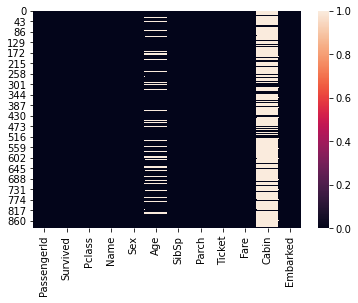

In [12]:
sns.heatmap(df.isnull())
plt.show()

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#filling the null values

In [15]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [16]:
df["Embarked"].nunique()

3

In [17]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

majority of the passengers embarked at S, so we cn replace the missing values with S

In [18]:
df['Embarked']=df['Embarked'].fillna('S')

In [19]:
df1=df.drop(["Cabin"],axis=1)

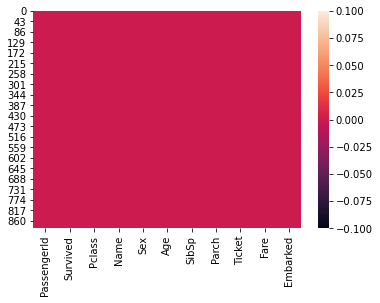

In [20]:
sns.heatmap(df1.isnull())
plt.show()

In [21]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
df1["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

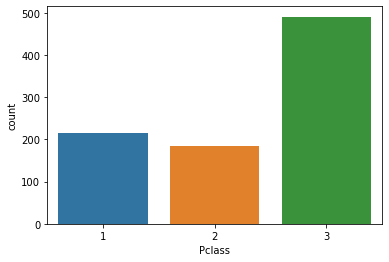

In [23]:
sns.countplot(df1['Pclass'])

most passengers are in class 3

<AxesSubplot:xlabel='Sex', ylabel='count'>

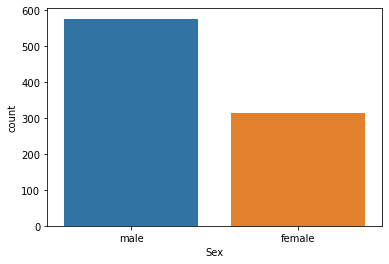

In [24]:
sns.countplot(df1['Sex'])

most passengers are male

<AxesSubplot:xlabel='Survived', ylabel='count'>

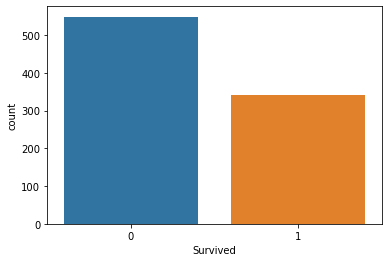

In [25]:
sns.countplot(df1["Survived"])

survival people are less in number

In [26]:
#checking for skewness

In [27]:
df1.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

PassengerId       AxesSubplot(0.125,0.125;0.0945122x0.755)
Survived       AxesSubplot(0.238415,0.125;0.0945122x0.755)
Pclass         AxesSubplot(0.351829,0.125;0.0945122x0.755)
Age            AxesSubplot(0.465244,0.125;0.0945122x0.755)
SibSp          AxesSubplot(0.578659,0.125;0.0945122x0.755)
Parch          AxesSubplot(0.692073,0.125;0.0945122x0.755)
Fare           AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

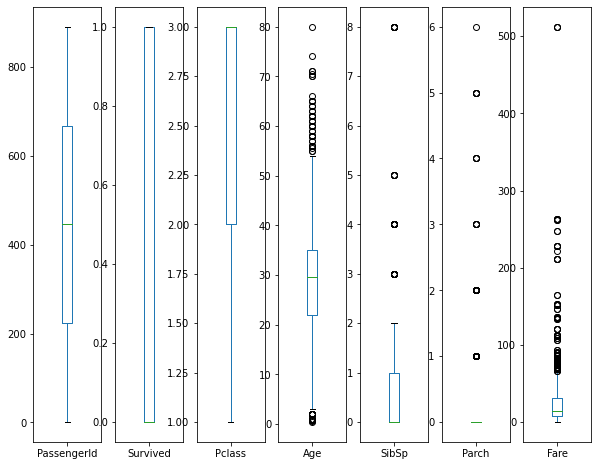

In [28]:
df1.plot(kind='box',subplots=True,figsize=(10,8))

passengerId, & survived are normally distributed 

Pclass is negatively skewed

SibSp,Parch and Fareare positively skewed.

In [30]:
#visualizing the data

<AxesSubplot:xlabel='PassengerId', ylabel='Density'>

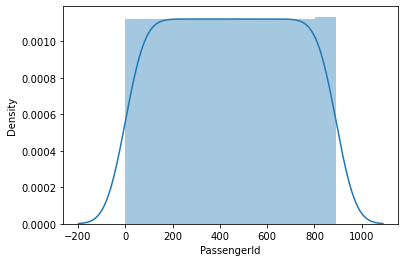

In [31]:
sns.distplot(df1['PassengerId'])

<AxesSubplot:xlabel='Survived', ylabel='Density'>

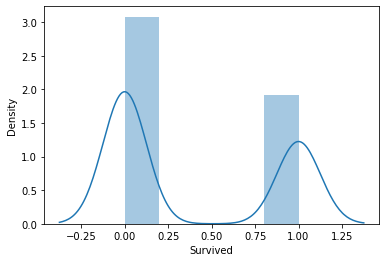

In [32]:
sns.distplot(df1['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

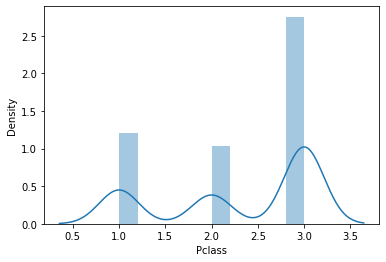

In [33]:
sns.distplot(df1['Pclass'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

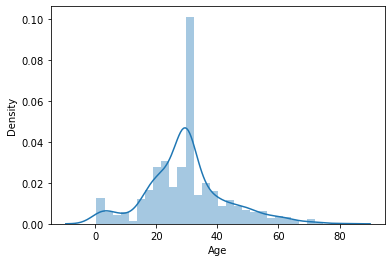

In [34]:
sns.distplot(df1['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

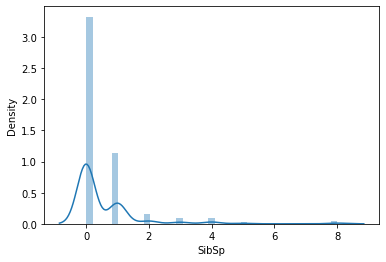

In [35]:
sns.distplot(df1['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

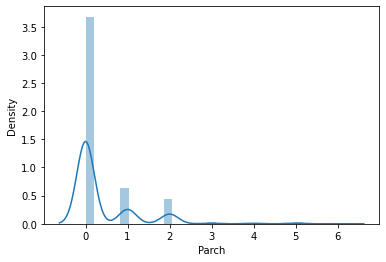

In [36]:
sns.distplot(df1['Parch'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

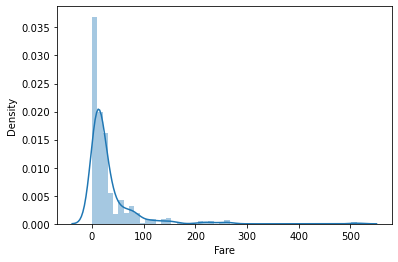

In [37]:
sns.distplot(df1['Fare'])

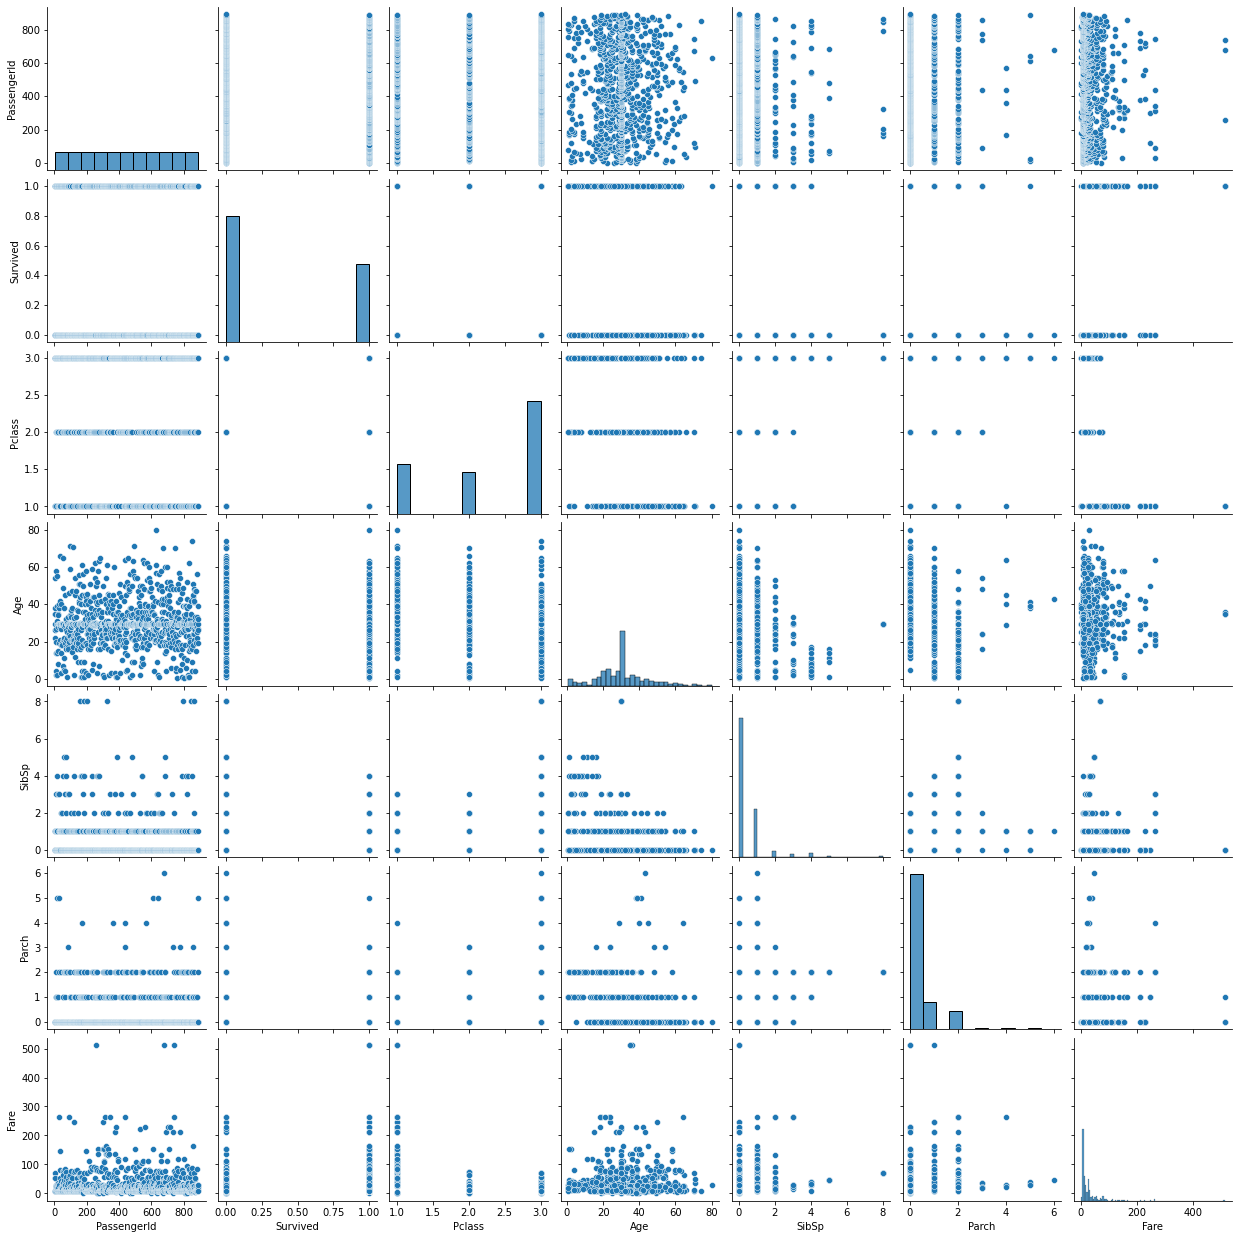

In [38]:
sns.pairplot(df1)

In [39]:
#first remove the unwanted columns then we can remov the skewness

In [40]:
df2= df1.drop(['Fare', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [41]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [42]:
df2.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [43]:
#change the object and sex column in numerical column by label encoder

In [44]:
df2['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['Sex']=le.fit_transform(df2['Sex'])
df2['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

male=1 and female=0

In [46]:
df2['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['Embarked']=le.fit_transform(df2['Embarked'])
df2['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

S=2, C=0, & Q=1 (encoded)

Survived       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Pclass      AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Sex         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Age         AxesSubplot(0.731522,0.536818;0.168478x0.343182)
SibSp             AxesSubplot(0.125,0.125;0.168478x0.343182)
Parch          AxesSubplot(0.327174,0.125;0.168478x0.343182)
Embarked       AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

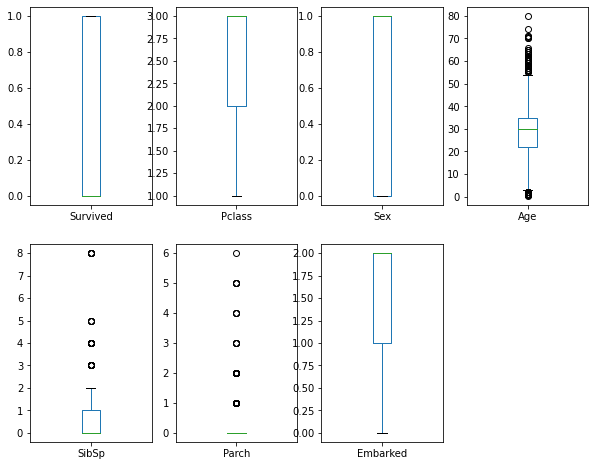

In [48]:
df2.plot(kind='box',subplots=True,figsize=(10,8),layout=(2,4))

In [49]:
from scipy.stats import zscore
z = np.abs(zscore(df2))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.43279337, 0.47367361,
        0.58595414],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.43279337, 0.47367361,
        1.9423032 ],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.4745452 , 0.47367361,
        0.58595414],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 0.43279337, 2.00893337,
        0.58595414],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.4745452 , 0.47367361,
        1.9423032 ],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.4745452 , 0.47367361,
        0.67817453]])

In [50]:
df3=df2[(z<3).all(axis=1)]

In [51]:
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.000000,1,0,2
1,1,1,0,38.000000,1,0,0
2,1,3,0,26.000000,0,0,2
3,1,1,0,35.000000,1,0,2
4,0,3,1,35.000000,0,0,2
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,2
887,1,1,0,19.000000,0,0,2
888,0,3,0,29.699118,1,2,2
889,1,1,1,26.000000,0,0,0


In [52]:
df2.shape

(891, 7)

In [53]:
df2.shape

(891, 7)

after removing outliers, we have 839 rows

In [54]:
#checking for multicollinearity

In [55]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif['Variables']=x1.columns
    vif['vif Factor']=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [57]:
calc_vif(df3)

,Variables,vif Factor
0,Survived,1.912097
1,Pclass,5.374571
2,Sex,3.695078
3,Age,4.749332
4,SibSp,1.474643
5,Parch,1.438816
6,Embarked,4.506243


In [58]:
df3.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.333312,-0.563663,-0.086185,0.101231,0.205516,-0.165100
Pclass,-0.333312,1.000000,0.153087,-0.314891,-0.069702,-0.111347,0.150115
Sex,-0.563663,0.153087,1.000000,0.092018,-0.204322,-0.254254,0.121491
Age,-0.086185,-0.314891,0.092018,1.000000,-0.159370,-0.260176,-0.013024
SibSp,0.101231,-0.069702,-0.204322,-0.159370,1.000000,0.340893,-0.008408
Parch,0.205516,-0.111347,-0.254254,-0.260176,0.340893,1.000000,-0.030666
Embarked,-0.165100,0.150115,0.121491,-0.013024,-0.008408,-0.030666,1.000000


<AxesSubplot:>

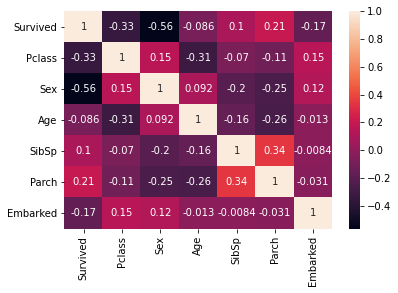

In [59]:
sns.heatmap(df3.corr(),annot=True)

In [60]:
#spliting the data into x and y

In [61]:
x=df3.drop('Survived',axis=1)
y=df3['Survived']

In [62]:
#Scaling the features in the dataset
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [63]:
#sending the data into ML testing

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [65]:
#Finding the best random_state
lr=LogisticRegression()
max=0
rs=0
for i in range(1001):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    score=accuracy_score(y_test,pred)
    if max<score:
        max=score
        rs=i
print('Max score is: ',max,' at random state -',rs)

Max score is:  0.8666666666666667  at random state - 91


<AxesSubplot:xlabel='Survived', ylabel='Density'>

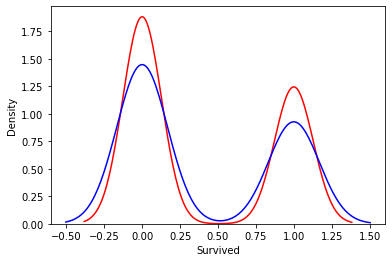

In [66]:
#Visualising the fitting of the model - wether overfit or underfit
ax1=sns.distplot(df3['Survived'],hist=False,color='r',label='Actual')
sns.distplot(pred,hist=False,color='b',label='Predicted',ax=ax1)

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=91)

In [105]:
#Let us import different models and metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [106]:
#Making instance of each model
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
svc=SVC()
knn=KNeighborsClassifier()

In [107]:
models=[lr,dtc,gnb,svc,knn]
for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(f'The accuracy score of {m} is :',accuracy_score(y_test,predm))
    print(f'The confusion matrix of {m} is:\n',confusion_matrix(y_test,predm))
    print(f'The classification report of {m} is :\n',classification_report(y_test,predm))
    print('\n')

The accuracy score of LogisticRegression() is : 0.8666666666666667
The confusion matrix of LogisticRegression() is:
 [[109  10]
 [ 18  73]]
The classification report of LogisticRegression() is :
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       119
           1       0.88      0.80      0.84        91

    accuracy                           0.87       210
   macro avg       0.87      0.86      0.86       210
weighted avg       0.87      0.87      0.87       210



The accuracy score of DecisionTreeClassifier() is : 0.8095238095238095
The confusion matrix of DecisionTreeClassifier() is:
 [[105  14]
 [ 26  65]]
The classification report of DecisionTreeClassifier() is :
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       119
           1       0.82      0.71      0.76        91

    accuracy                           0.81       210
   macro avg       0.81      0.80      0.80      

Logistic regration is giving best accuracy

In [108]:
#Let us check with the cv score
from sklearn.model_selection import cross_val_score
for m in models:
    cvscore=cross_val_score(m,x,y,cv=10)
    print(f'Metrics of model {m}')
    print(cvscore)
    print(f'Mean cv score: ',cvscore.mean())
    print(cvscore.std())
    print('\n')

Metrics of model LogisticRegression()
[0.78571429 0.78571429 0.76190476 0.8452381  0.77380952 0.77380952
 0.79761905 0.78571429 0.80952381 0.8313253 ]
Mean cv score:  0.7950372920252439
0.025126124021946913


Metrics of model DecisionTreeClassifier()
[0.66666667 0.75       0.73809524 0.78571429 0.82142857 0.79761905
 0.8452381  0.76190476 0.83333333 0.78313253]
Mean cv score:  0.7783132530120481
0.04996910714930067


Metrics of model GaussianNB()
[0.72619048 0.76190476 0.73809524 0.83333333 0.79761905 0.77380952
 0.82142857 0.75       0.80952381 0.80722892]
Mean cv score:  0.7819133677567413
0.03516375234440463


Metrics of model SVC()
[0.82142857 0.85714286 0.75       0.8452381  0.83333333 0.77380952
 0.82142857 0.76190476 0.8452381  0.84337349]
Mean cv score:  0.8152897303499713
0.03683536988898986


Metrics of model KNeighborsClassifier()
[0.75       0.79761905 0.76190476 0.80952381 0.89285714 0.78571429
 0.82142857 0.72619048 0.79761905 0.74698795]
Mean cv score:  0.788984509466437

By comparing accuracy_score and cv score : The best model is - Knn

In [109]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(f'The accuracy score of knn is :',accuracy_score(y_test,predm))
print(f'The confusion matrix of knn is:\n',confusion_matrix(y_test,predm))
print(f'The classification report of knn is :\n',classification_report(y_test,predm))

The accuracy score of knn is : 0.8285714285714286
The confusion matrix of knn is:
 [[105  14]
 [ 22  69]]
The classification report of knn is :
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       119
           1       0.83      0.76      0.79        91

    accuracy                           0.83       210
   macro avg       0.83      0.82      0.82       210
weighted avg       0.83      0.83      0.83       210



In [110]:
#Hyper parameter tuning of knn  model using GridSearchCV
from sklearn.model_selection import GridSearchCV
par={'n_neighbors':[1,5,10,15,20,30,40,50],'weights':['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,30,50,80],'p':[1,2]}
grid=GridSearchCV(knn,param_grid=par)
grid.fit(x_train,y_train)
print('Best score:',grid.best_score_)
print('Best Estimator:',grid.best_estimator_)
print('Best parameter:',grid.best_params_)

Best score: 0.8108444444444445
Best Estimator: KNeighborsClassifier(leaf_size=10, n_neighbors=10, p=1)
Best parameter: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}


In [111]:
best_model=KNeighborsClassifier(algorithm='auto', leaf_size= 10, n_neighbors= 15, p= 2, weights= 'uniform')
best_model.fit(x_train,y_train)
predb=best_model.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predb))
print('Confusion matrix:\n',confusion_matrix(y_test,predb))
print('classification report:\n',classification_report(y_test,predb))

Accuracy Score 0.8571428571428571
Confusion matrix:
 [[111   8]
 [ 22  69]]
classification report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       119
           1       0.90      0.76      0.82        91

    accuracy                           0.86       210
   macro avg       0.87      0.85      0.85       210
weighted avg       0.86      0.86      0.86       210



accuracy is 86%

In [112]:
#Making a data frame to see the values actual and predicted
results=pd.DataFrame({})
results['Actual']=y_test
results['Predicted']=predb

In [113]:
results

,Actual,Predicted
802,1,1
488,0,0
507,1,0
161,1,1
45,0,0
...,...,...
838,1,0
804,1,0
799,0,1
394,1,1


In [117]:
#plotting the auc _ roc curve
from sklearn.metrics import roc_auc_score
#Predicting the probability of having 1 in the x-test
y_pred_prob=best_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.66666667, 0.2       , 0.26666667, 0.93333333, 0.13333333,
       1.        , 0.2       , 0.        , 1.        , 0.73333333,
       0.13333333, 0.06666667, 0.6       , 0.73333333, 0.13333333,
       0.4       , 1.        , 0.6       , 0.13333333, 0.93333333,
       0.13333333, 0.13333333, 0.66666667, 0.13333333, 1.        ,
       0.13333333, 0.26666667, 0.26666667, 0.13333333, 0.2       ,
       0.2       , 0.2       , 0.13333333, 0.4       , 0.06666667,
       0.53333333, 0.06666667, 0.73333333, 0.06666667, 0.        ,
       0.73333333, 0.33333333, 0.8       , 0.73333333, 0.86666667,
       0.6       , 0.6       , 0.06666667, 0.2       , 0.8       ,
       0.13333333, 1.        , 0.13333333, 0.6       , 0.4       ,
       0.4       , 0.46666667, 0.53333333, 0.06666667, 0.46666667,
       0.13333333, 0.26666667, 0.13333333, 0.06666667, 0.26666667,
       0.13333333, 0.13333333, 0.06666667, 1.        , 0.06666667,
       0.06666667, 0.        , 0.2       , 0.13333333, 1.     

In [118]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

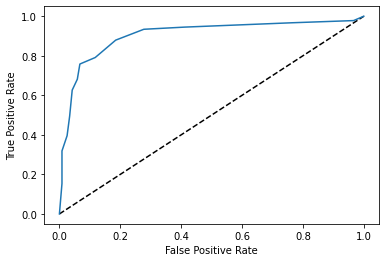

Score: 0.8455074337427279


In [120]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,best_model.predict(x_test))
print('Score:',auc_score)

In [121]:
#Let us save the best model
import joblib
joblib.dump(best_model,'Titanic.obj')

['Titanic.obj']